In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df= pd.read_csv("new_dataset.csv")
df2= pd.read_csv("archive (7)/cleansingWine.csv")
df.head()

C:\Users\Lamia\AppData\Local\Temp\ipykernel_20536\2316734748.py:2: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df2= pd.read_csv("archive (7)/cleansingWine.csv")


,description,points,price,province,variety
0,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Portuguese Red
1,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris
2,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Pinot Noir
3,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Gewürztraminer
4,Savory dried thyme notes accent sunnier flavor...,87,12.0,Rheinhessen,Gewürztraminer


In [3]:
df2.head()

,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


In [4]:
#On veut enlever les colonnes varietes 2 3 4 5 6 .....jusqu'à 12
columns_to_drop=[f'varieties{i}' for i in range (2,13)]
df2=df2.drop(columns=columns_to_drop)
df2.head()

,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


In [5]:
taux_de_change=0.00074
df2["price_usd"]=round(df2["price"]*taux_de_change,2)
df2.head()

,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,abv,degree,sweet,acidity,body,tannin,price,year,ml,price_usd
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750,162.8
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750,81.4
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750,0.0
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750,0.0
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750,0.0


In [6]:
# enlever les sweet, acidity etc... from les données 
import re
def extraire_chiffres_apres_sweet(chaine):
    chiffres = re.findall(r'\d+', str(chaine))  # Trouver tous les chiffres
    try:
        return int(''.join(chiffres))
    except:
        return np.nan

df2['acidity'] = df2['acidity'].apply(extraire_chiffres_apres_sweet)
df2['body'] = df2['body'].apply(extraire_chiffres_apres_sweet)
df2['sweet'] = df2['sweet'].apply(extraire_chiffres_apres_sweet)
df2['tannin'] = df2['tannin'].apply(extraire_chiffres_apres_sweet)
df2.head()

,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,abv,degree,sweet,acidity,body,tannin,price,year,ml,price_usd
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,14~15,17~19,1.0,4.0,5.0,4.0,220000,2014,750,162.8
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,14~15,16~18,1.0,3.0,4.0,4.0,110000,2016,750,81.4
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,11~12,15~17,2.0,3.0,2.0,2.0,0,0,750,0.0
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,11~12,9~11,1.0,3.0,2.0,1.0,0,0,750,0.0
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,13~14,17~19,1.0,3.0,3.0,4.0,0,2003,750,0.0


In [7]:
#pour abv, on veut avoir la moyenne du range, pour cela on doit spliter ce qu'il y a entre ~
def get_abv_avg(x):
    try : 
        return np.mean([float(i) for i in x.split("~")])
    except: 
        return x

df2['abv'] = df2['abv'].apply(get_abv_avg)
df2


#SINON :    def extract_numbers(s):
    #if isinstance(s, str):
       # return [float(num) for num in re.findall(r'\d+\.\d+|\d+', s)]
   # elif isinstance(s, (int, float)):
      #  return [float(s)]
   # else:
       # return []
#df2['abv_clean']=df2['abv'].apply(extract_numbers)
#df2["abv_clean"]=df2["abv_clean"].apply(lambda x: sum(x)/len(x))

#df2

,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,abv,degree,sweet,acidity,body,tannin,price,year,ml,price_usd
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,14.5,17~19,1.0,4.0,5.0,4.0,220000,2014,750,162.80
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,14.5,16~18,1.0,3.0,4.0,4.0,110000,2016,750,81.40
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,11.5,15~17,2.0,3.0,2.0,2.0,0,0,750,0.00
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,11.5,9~11,1.0,3.0,2.0,1.0,0,0,750,0.00
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,13.5,17~19,1.0,3.0,3.0,4.0,0,2003,750,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,21600,168703,"Besserat de Bellefon, Bleu Brut",Besserat de Bellefon,France,Champagne,NaN,NaN,NaN,Pinot Meunier,...,NaN,NaN,1.0,5.0,2.0,1.0,128000,0,750,94.72
21601,21601,168704,"Leopard’s Leap, Cuvee Brut",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,NaN,NaN,Chardonnay,...,12.5,6~8,1.0,5.0,2.0,1.0,40000,0,750,29.60
21602,21602,168705,"Leopard’s Leap, Chardonnay Pinot Noir",Leopards Leap,the Republic of South Africa,Western Cape,NaN,NaN,NaN,Chardonnay,...,12.5,10~12,1.0,3.0,2.0,1.0,40000,2020,750,29.60
21603,21603,168706,"Leopard’s Leap, Chardonnay",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,Wellington,NaN,Chardonnay,...,12.5,10~12,1.0,3.0,2.0,1.0,40000,2020,750,29.60


In [8]:
df2.groupby('varieties1')[["sweet","acidity", "body","tannin","abv"]].mean()

,sweet,acidity,body,tannin,abv
varieties1,,,,,
Abouriou,1.000000,3.000000,2.000000,3.000000,NaN
Agiorgitiko,1.000000,3.000000,3.333333,3.000000,13.166667
Aglianico,1.218182,2.327273,4.472727,3.509091,13.524390
Airen,2.044444,3.066667,2.222222,1.000000,10.987179
Albana,1.000000,4.000000,2.000000,1.000000,13.000000
...,...,...,...,...,...
Zelen,1.000000,3.333333,2.666667,1.000000,12.150000
Zibibbo,3.800000,2.000000,3.600000,1.000000,13.833333
Zinfandel,1.521277,2.622340,3.819149,2.856383,13.462230


In [9]:
import numpy as np

df_final=pd.merge(df, df2.groupby('varieties1')[["sweet","acidity", "body","tannin","abv"]].mean(),left_on='variety', right_on='varieties1', how='inner' )
df_final.head()

,description,points,price,province,variety,sweet,acidity,body,tannin,abv
0,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris,1.557143,3.5,2.957143,1.0,13.016216
1,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Pinot Gris,1.557143,3.5,2.957143,1.0,13.016216
2,This wine has a touch of perceptible sweetness...,88,18.0,California,Pinot Gris,1.557143,3.5,2.957143,1.0,13.016216
3,"Fresh apple, lemon and pear flavors are accent...",88,18.0,New York,Pinot Gris,1.557143,3.5,2.957143,1.0,13.016216
4,"Beautiful deep gold color. Intense, concentrat...",90,112.0,Alsace,Pinot Gris,1.557143,3.5,2.957143,1.0,13.016216


In [10]:
df_final.to_csv("wine_merge.csv", index=False)

In [ ]:
df_last=pd.read_csv("")

In [11]:
#Régressions :

print(df_final.shape)

print (df_final.describe(include="all"))



(64010, 10)
                                              description        points  \
count                                               64010  64010.000000   
unique                                              59179           NaN   
top     Seductively tart in lemon pith, cranberry and ...           NaN   
freq                                                    3           NaN   
mean                                                  NaN     88.610451   
std                                                   NaN      3.150001   
min                                                   NaN     80.000000   
25%                                                   NaN     86.000000   
50%                                                   NaN     88.000000   
75%                                                   NaN     91.000000   
max                                                   NaN    100.000000   

               price    province     variety         sweet       acidity  \
count   640

c:\Users\Lamia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 100000x100000 with 0 Axes>

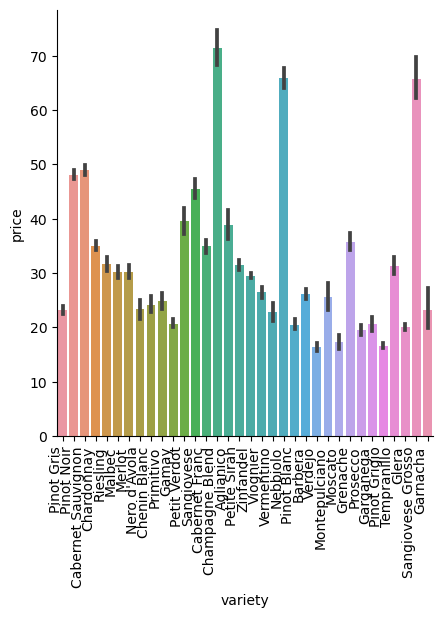

In [12]:
plt.figure(figsize=(1000,1000))
sns.catplot(x="variety", y="price", data=df_final, kind="bar")
plt.xticks(rotation=90, ha='right')
plt.show()

c:\Users\Lamia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 100000x100000 with 0 Axes>

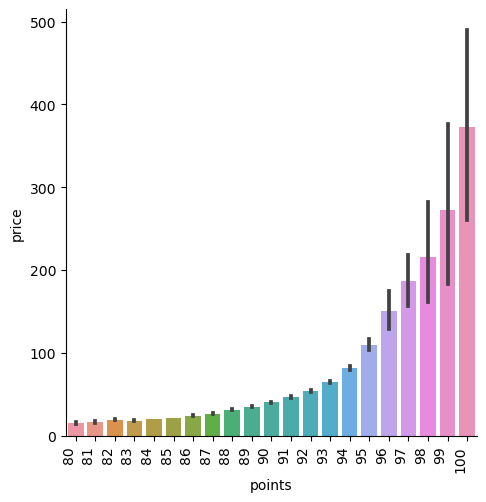

In [13]:
plt.figure(figsize=(1000,1000))
sns.catplot(x="points", y="price", data=df_final, kind="bar")
plt.xticks(rotation=90, ha='right')
plt.show()

c:\Users\Lamia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 100000x100000 with 0 Axes>

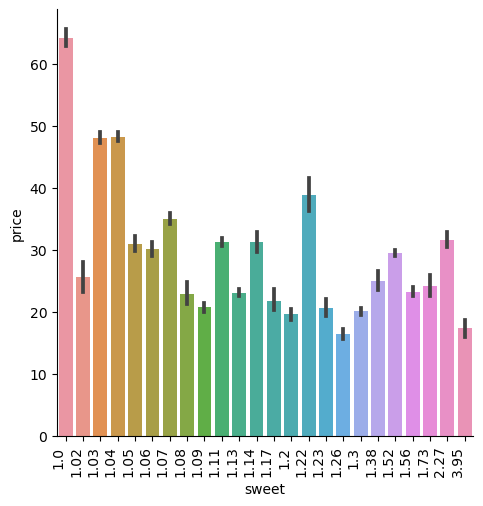

In [14]:
df_final["sweet"]=round(df_final["sweet"],2)


plt.figure(figsize=(1000,1000))
sns.catplot(x="sweet", y="price", data=df_final, kind="bar")
plt.xticks(rotation=90, ha='right')
plt.show()

c:\Users\Lamia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 100000x100000 with 0 Axes>

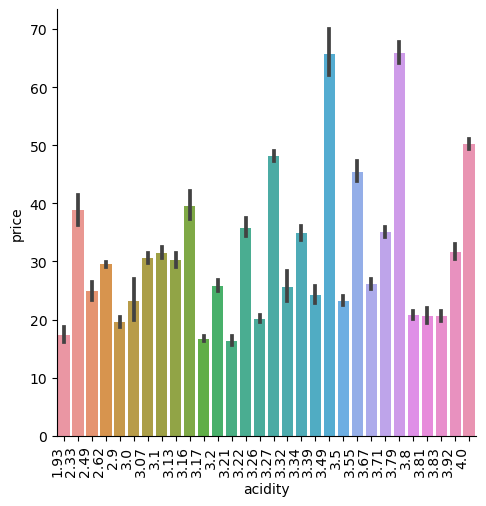

In [15]:
df_final["acidity"]=round(df_final["acidity"],2)
plt.figure(figsize=(1000,1000))
sns.catplot(x="acidity", y="price", data=df_final, kind="bar")
plt.xticks(rotation=90, ha='right')
plt.show()

c:\Users\Lamia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 100000x100000 with 0 Axes>

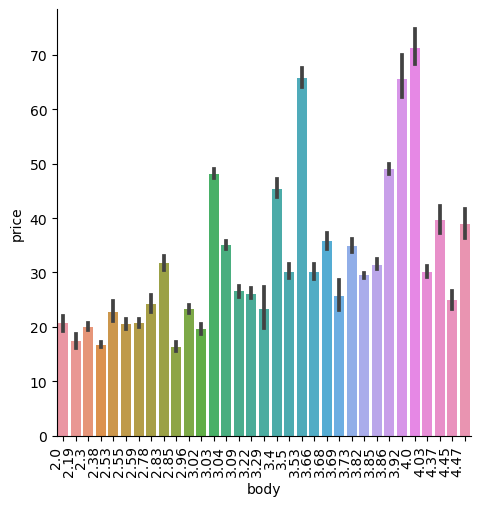

In [16]:
df_final["body"]=round(df_final["body"],2)
plt.figure(figsize=(1000,1000))
sns.catplot(x="body", y="price", data=df_final, kind="bar")
plt.xticks(rotation=90, ha='right')
plt.show()

c:\Users\Lamia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 100000x100000 with 0 Axes>

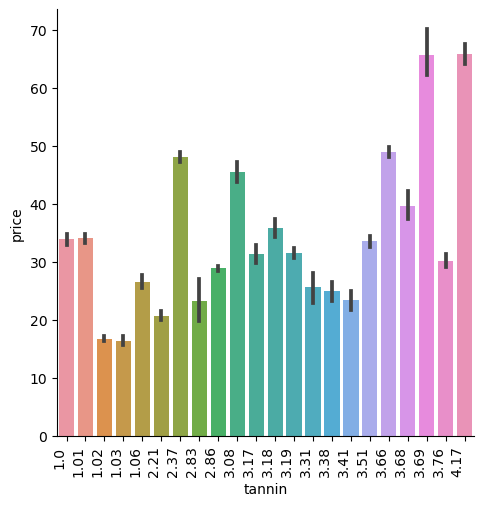

In [17]:
df_final["tannin"]=round(df_final["tannin"],2)
plt.figure(figsize=(1000,1000))
sns.catplot(x="tannin", y="price", data=df_final, kind="bar")
plt.xticks(rotation=90, ha='right')
plt.show()

c:\Users\Lamia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 100000x100000 with 0 Axes>

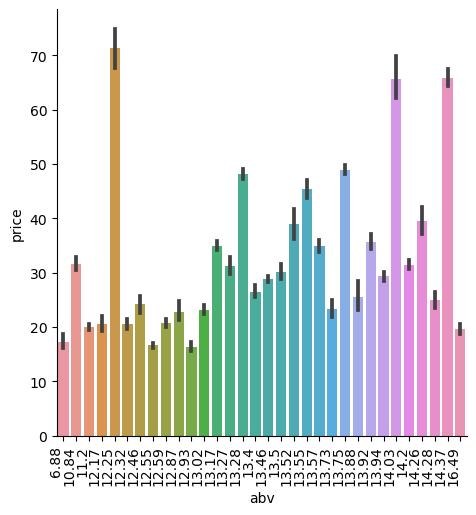

In [18]:
df_final["abv"]=round(df_final["abv"],2)
plt.figure(figsize=(1000,1000))
sns.catplot(x="abv", y="price", data=df_final, kind="bar")
plt.xticks(rotation=90, ha='right')
plt.show()

In [19]:
df_final.any().isnull()

description    False
points         False
price          False
province       False
variety        False
sweet          False
acidity        False
body           False
tannin         False
abv            False
dtype: bool

In [20]:
print("Separating labels from features...")
features_list=["points","variety","province", "sweet", "acidity", "body","tannin","abv"]
x=df_final.loc[:,features_list]
y=df_final.loc[:,"price"]
print("...Done.")
print()



Separating labels from features...
...Done.



In [21]:
print("Splitting dataset into train set and test set...")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0,stratify=None)
print("...Done.")         

Splitting dataset into train set and test set...
...Done.


In [22]:
print("Encoding categorical features and standardizing numerical features...")
print()

print (x_train.head())
print()

numeric_features=["points","sweet","acidity","body","tannin","abv"]
numeric_transformer=StandardScaler()

categorical_feature=["variety","province"]
categorical_transformer=OneHotEncoder()

feature_encoder=ColumnTransformer(transformers=[('cat',categorical_transformer,categorical_feature),('num', numeric_transformer, numeric_features)])
x_train=feature_encoder.fit_transform(x_train)
type(x_train)
print(x_train[0:5,:])

Encoding categorical features and standardizing numerical features...

       points         variety        province  sweet  acidity  body  tannin  \
61566      85     Tempranillo  Northern Spain   1.14     3.07  3.66    3.17   
58047      86         Verdejo  Northern Spain   1.26     3.21  2.85    1.03   
36799      87        Riesling      California   2.27     3.92  2.83    1.00   
48076      87  Cabernet Franc        New York   1.11     3.34  3.73    3.19   
7027       86      Pinot Noir      California   1.03     4.00  3.03    2.37   

         abv  
61566  13.27  
58047  12.93  
36799  10.84  
48076  13.57  
7027   13.28  

  (0, 29)	1.0
  (0, 69)	1.0
  (0, 91)	-1.1456001682842962
  (0, 92)	-0.14196090077175605
  (0, 93)	-1.1189294238634808
  (0, 94)	0.7347460931398572
  (0, 95)	0.7098240099221363
  (0, 96)	0.0743120384437439
  (1, 30)	1.0
  (1, 69)	1.0
  (1, 91)	-0.8281531397965755
  (1, 92)	0.17686315247367107
  (1, 93)	-0.7761355798577754
  (1, 94)	-1.021264949541539
  (1, 95)	

In [23]:
#train model

regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
y_train_pred=regressor.predict(x_train)
print(y_train_pred[:5])
print()

[17.85868525 14.9831966  19.16221164 28.32805839 29.04459558]



In [25]:
print(x_test)
print ()

x_test=feature_encoder.transform(x_test)

print(x_test[:5])

       points     variety          province  sweet  acidity  body  tannin  \
11732      93  Pinot Noir        California   1.03     4.00  3.03    2.37   
26147      88  Chardonnay        California   1.07     3.71  3.04    1.01   
39940      86      Malbec  Mendoza Province   1.06     3.07  4.03    3.76   
37384      93    Riesling           Kamptal   2.27     3.92  2.83    1.00   
5639       92  Pinot Noir        California   1.03     4.00  3.03    2.37   
...       ...         ...               ...    ...      ...   ...     ...   
45998      89  Sangiovese           Tuscany   1.04     3.55  3.40    3.08   
51263      82   Zinfandel        California   1.52     2.62  3.82    2.86   
38579      91      Malbec  Southwest France   1.06     3.07  4.03    3.76   
47109      85  Sangiovese        California   1.04     3.55  3.40    3.08   
5289       81  Pinot Noir        California   1.03     4.00  3.03    2.37   

         abv  
11732  13.28  
26147  13.17  
39940  13.94  
37384  10.84  


In [26]:
y_test_pred=regressor.predict(x_test)
print(y_test_pred[:5])
print()

[64.22678038 29.12480848 20.18905201 43.16180058 59.20075398]



In [27]:
print ("R2 score on training set : ", regressor.score(x_train, y_train))
print ("R2 score on test set : ", regressor.score(x_test, y_test))

R2 score on training set :  0.2926021790976724
R2 score on test set :  0.306126091922436


In [80]:
print ("coefficients are :", regressor.coef_)
print ("constant is", regressor.intercept_)

coefficients are : [-1.26544605e+00 -8.32509378e+00  2.56769861e+00  1.18167458e+01
  1.52346743e+00  2.02387582e+00  2.90075815e+00 -8.74243247e+00
 -3.48902727e-01  5.81209360e+00  1.94901093e+00 -2.03975312e+00
  1.01380168e+00  2.90272687e+00 -4.07791687e+00  2.03137288e+00
  1.14998630e+01 -8.45783394e+00  2.52614883e+00 -5.46778725e+00
 -2.53211598e+00  2.89363085e+00 -2.87350907e+00  6.78024687e+00
 -5.38500878e+00  2.64468821e+00 -3.22201918e+00 -5.01397540e+00
 -2.51467334e+00  3.31039301e+00  3.75008655e+00 -6.77822791e+00
  2.01056225e+00 -2.91247550e+00 -1.17303908e+01 -8.51738626e-01
 -3.03222391e+00  3.58351491e-01 -8.45209778e-01 -9.56140835e+00
  3.43727631e+01  2.94971257e+00 -8.64243503e-01  1.06687587e+01
  1.97504504e+00 -6.56480049e+00 -1.04829506e+01  4.25825681e+01
 -1.39101811e+01 -1.01839511e+01 -1.04546650e+00 -2.69412511e+00
 -1.13640349e+01 -3.20685688e+00 -2.73883679e+00 -5.31298597e+00
 -9.66533380e+00 -1.16961116e+00 -1.06227178e+01 -7.06653714e+00
  2.99

In [60]:
print(x_train[:5])


  (0, 29)	1.0
  (0, 69)	1.0
  (0, 91)	-1.1456001682842962
  (0, 92)	-0.14196090077175605
  (0, 93)	-1.1189294238634808
  (0, 94)	0.7347460931398572
  (0, 95)	0.7098240099221363
  (0, 96)	0.0743120384437439
  (1, 30)	1.0
  (1, 69)	1.0
  (1, 91)	-0.8281531397965755
  (1, 92)	0.17686315247367107
  (1, 93)	-0.7761355798577754
  (1, 94)	-1.021264949541539
  (1, 95)	-1.2277821646742748
  (1, 96)	-0.294688359118719
  (2, 26)	1.0
  (2, 41)	1.0
  (2, 91)	-0.5107061113088546
  (2, 92)	2.8602989339560136
  (2, 93)	0.9623189147425858
  (2, 94)	-1.0646232468916967
  (2, 95)	-1.2549448680564674
  (2, 96)	-2.562955508840918
  (3, 2)	1.0
  (3, 66)	1.0
  (3, 91)	-0.5107061113088546
  (3, 92)	-0.22166691408311226
  (3, 93)	-0.45782701042390667
  (3, 94)	0.8865001338654095
  (3, 95)	0.7279324788435981
  (3, 96)	0.39990062452827085
  (4, 23)	1.0
  (4, 41)	1.0
  (4, 91)	-0.8281531397965755
  (4, 92)	-0.434216282913397
  (4, 93)	1.1582011113172745
  (4, 94)	-0.6310402733901181
  (4, 95)	-0.01451474693633500

In [61]:
print("All transformers are: ", feature_encoder.transformers_)
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])


All transformers are:  [('cat', OneHotEncoder(), ['variety', 'province']), ('num', StandardScaler(), ['points', 'sweet', 'acidity', 'body', 'tannin', 'abv'])]
One Hot Encoder transformer is:  OneHotEncoder()


In [62]:
categorical_column_names = feature_encoder.transformers_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [('cat', OneHotEncoder(), ['variety', 'province']), ('num', StandardScaler(), ['points', 'sweet', 'acidity', 'body', 'tannin', 'abv'])]


In [63]:
numerical_column_names = list(x.loc[:, numeric_features].columns) # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)


numerical columns are:  ['points', 'sweet', 'acidity', 'body', 'tannin', 'abv']


In [64]:
all_columns_name= categorical_column_names+numerical_column_names
all_columns_name

[('cat', OneHotEncoder(), ['variety', 'province']),
 ('num',
  StandardScaler(),
  ['points', 'sweet', 'acidity', 'body', 'tannin', 'abv']),
 'points',
 'sweet',
 'acidity',
 'body',
 'tannin',
 'abv']

In [73]:
print(len(all_columns_name))
print(len(regressor.coef_))

8
97


In [86]:
coefficients=regressor.coef_
coefficients

array([-1.26544605e+00, -8.32509378e+00,  2.56769861e+00,  1.18167458e+01,
        1.52346743e+00,  2.02387582e+00,  2.90075815e+00, -8.74243247e+00,
       -3.48902727e-01,  5.81209360e+00,  1.94901093e+00, -2.03975312e+00,
        1.01380168e+00,  2.90272687e+00, -4.07791687e+00,  2.03137288e+00,
        1.14998630e+01, -8.45783394e+00,  2.52614883e+00, -5.46778725e+00,
       -2.53211598e+00,  2.89363085e+00, -2.87350907e+00,  6.78024687e+00,
       -5.38500878e+00,  2.64468821e+00, -3.22201918e+00, -5.01397540e+00,
       -2.51467334e+00,  3.31039301e+00,  3.75008655e+00, -6.77822791e+00,
        2.01056225e+00, -2.91247550e+00, -1.17303908e+01, -8.51738626e-01,
       -3.03222391e+00,  3.58351491e-01, -8.45209778e-01, -9.56140835e+00,
        3.43727631e+01,  2.94971257e+00, -8.64243503e-01,  1.06687587e+01,
        1.97504504e+00, -6.56480049e+00, -1.04829506e+01,  4.25825681e+01,
       -1.39101811e+01, -1.01839511e+01, -1.04546650e+00, -2.69412511e+00,
       -1.13640349e+01, -